<a href="https://colab.research.google.com/github/Abdullahcys10/MachineLearning6my2/blob/main/lab3/CCSIT_ARTI308_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 3: Exploratory Data Analysis (EDA)

In this assignment, Exploratory Data Analysis (EDA) is applied to the selected dataset to understand its structure and key characteristics before building any machine learning model.

EDA helps identify missing values, detect outliers, explore patterns, and analyze relationships between variables. Understanding the data is an essential step to ensure accurate and reliable model development.

Through this analysis, meaningful insights are extracted from the dataset to better prepare it for future modeling tasks.

step1

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [54]:
# Load Dataset

df = pd.read_csv("train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (2).csv


### Check Missing Values

In [56]:
# Check missing values first 5
print(df.isna().head())

      Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  False       False     False        False    False   False   True     False   
1  False       False     False        False    False   False   True     False   
2  False       False     False        False    False   False   True     False   
3  False       False     False        False    False   False   True     False   
4  False       False     False        False    False   False   True     False   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0        False      False  ...     False    True   True         True    False   
1        False      False  ...     False    True   True         True    False   
2        False      False  ...     False    True   True         True    False   
3        False      False  ...     False    True   True         True    False   
4        False      False  ...     False    True   True         True    False   

   MoSold  YrSold  SaleTyp

### Check duplicate rows

In [57]:
# checking duplicate rows
df.duplicated().sum()

np.int64(0)

### No. of rows and columns

In [58]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape, "\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (1460, 81) 

number of rows:  1460
number of columns:  81


### Data type of columns

In [59]:
# viewing the data types of columns
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


### Descriptive summary Statistics

In [60]:
# Statistical summary
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### Univariate Analysis

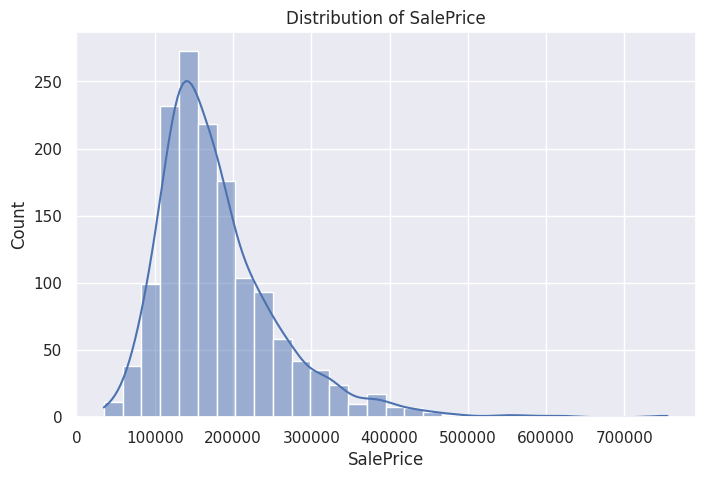

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

- Shows how shipment sizes are distributed
- Right skew = many small shipments, few large ones

## Step 9: Boxplot of SalePrice (Outliers)

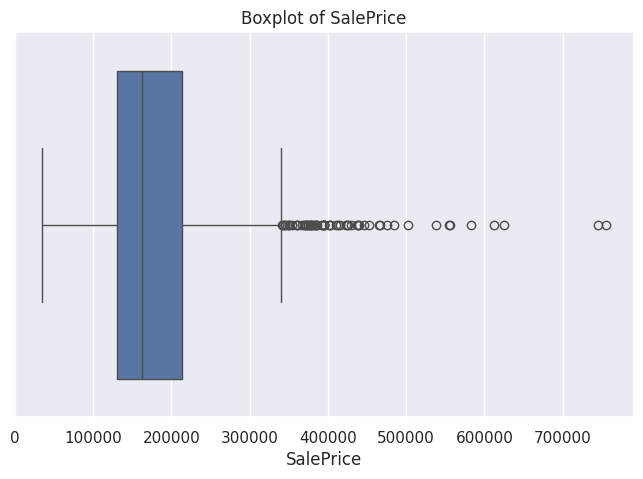

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot of SalePrice")
plt.show()

### Corelation Matrix

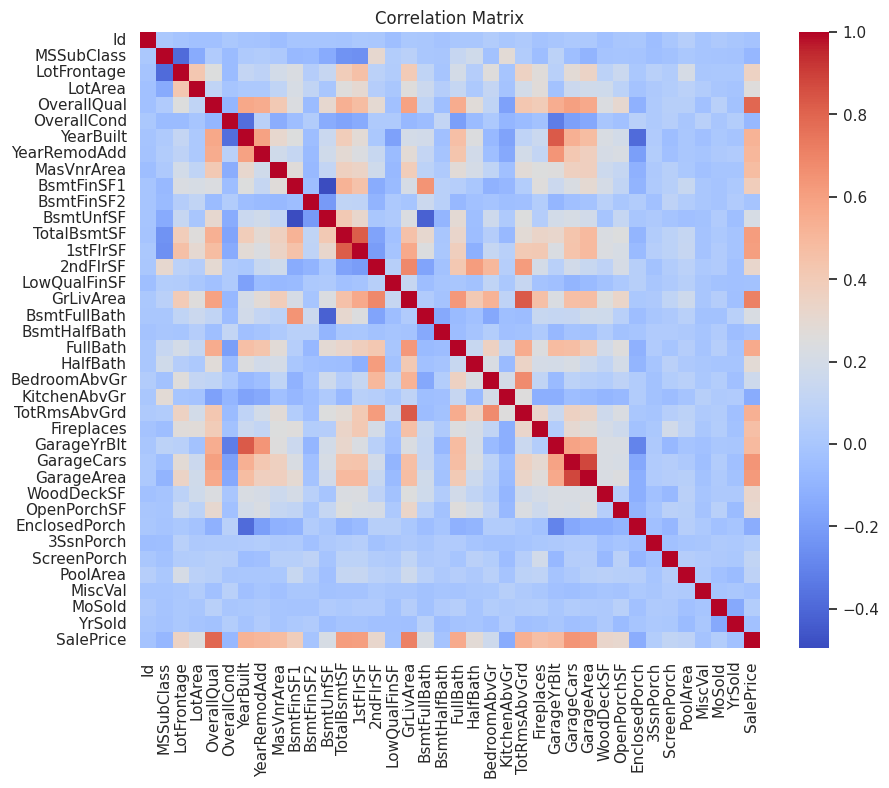

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Living Area vs Sale Price

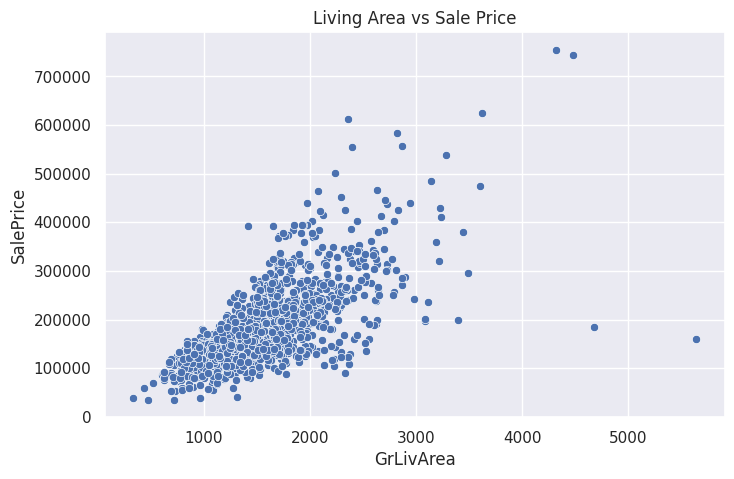

In [64]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Living Area vs Sale Price")
plt.show()

### Overall Quality vs Sale Price

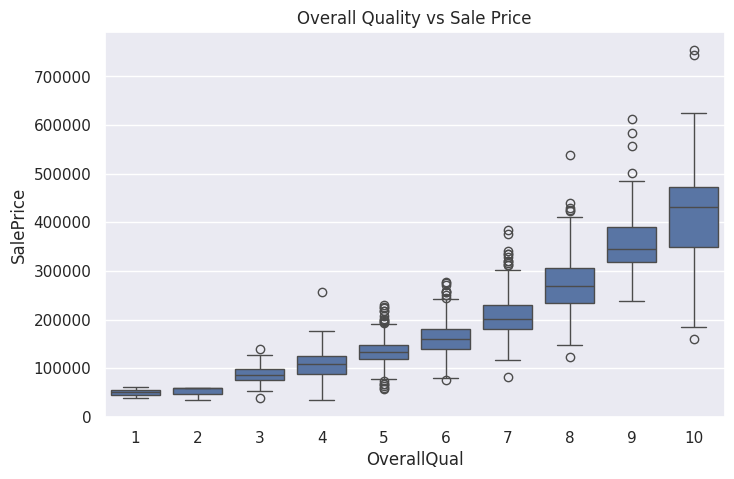

In [65]:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Overall Quality vs Sale Price")
plt.show()


## Top Correlated Features with SalePrice

We list the top numerical features that have the strongest correlation with SalePrice.

In [66]:
corr = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

top10 = corr.head(11)  # includes SalePrice itself
print(top10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.